In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
theta = np.linspace(0, 2 * np.pi, 150)
radius = 55
SAT_len = 22
SAT_plane = 2

In [61]:
SATs = np.zeros((SAT_len*SAT_plane, 3, 150))
for i in range(SAT_len):
    SATs[i,0,:] = 65*i + radius * np.cos(theta)
    SATs[i,1,:] =  10  + radius * np.sin(theta)

    SATs[i + SAT_len,0,:] = -25 + 65*i + radius * np.cos(theta)
    SATs[i + SAT_len,1,:] =  10 +   65 + radius * np.sin(theta)

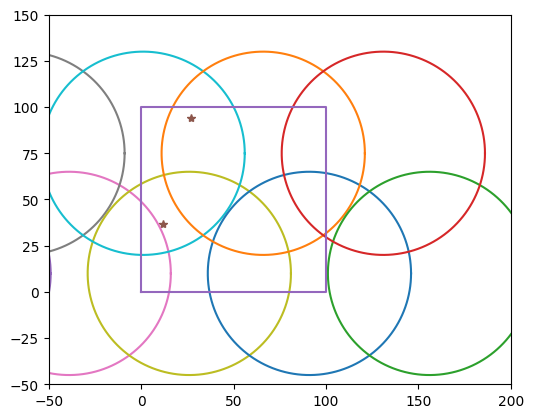

In [67]:
rect = [[0,0], [100,0], [0,100], [100,100]]

GS_size = 2
GSs = np.zeros((GS_size, 3))

for i in range(GS_size):
    GSs[i][0] = np.random.randint(0,100 + 1)
    GSs[i][1] = np.random.randint(0,100 + 1)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

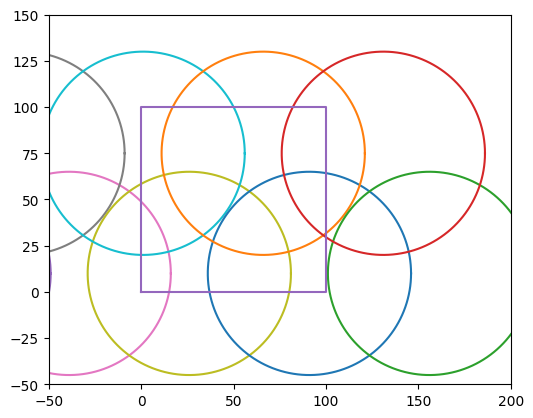

In [62]:
def SAT_location(SAT, SAT_len, time, speed, radius, theta):
    for i in range(SAT_len):
        SAT[i,0,:] = 65*i -speed * time + radius * np.cos(theta)
        SAT[i,1,:] =  10                + radius * np.sin(theta)

        SAT[i + SAT_len,0,:] = -25 + 65*i -speed * time + radius * np.cos(theta)
        SAT[i + SAT_len,1,:] =  10 +   65               + radius * np.sin(theta)
    
    return SAT

SATs = SAT_location(SATs, SAT_len=SAT_len, time=155, speed=7.8, radius=radius, theta=theta)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])
#axes.plot(c_x_1, c_y_1)
axes.plot([0,100,100,0,0], [0,0,100,100,0])

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

In [57]:
SAT_coord = np.zeros((SAT_len*2,3))

def SAT_location_(SAT, SAT_len, time, speed):
    for i in range(SAT_len):
        SAT[i,0] = 65*i -speed * time
        SAT[i,1] = 10

        SAT[i+SAT_len,0] = -25 + 65*i -speed * time
        SAT[i+SAT_len,1] =  10 + 65
    
    return SAT

SAT_coord = SAT_location_(SAT_coord, SAT_len=SAT_len, time=155, speed=7.8)

GS = GSs[:,0:2]
SAT = SAT_coord[:,0:2]

In [58]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])

print(dist)

[[1239.04035447 1174.04258867 1109.04508475 1044.04789162  979.05107119
   914.05470296  849.05889077  784.06377292  719.06953767  654.07644813
   589.08488353  524.09541116  459.10891954  394.12688312  329.1519406
   264.18932605  199.25109786  134.37261626   69.72087205   10.77032961
    61.81423784  126.39620247 1266.2231241  1201.34341468 1136.47745248
  1071.62773387 1006.79739769  941.99044581  877.21206102  812.46907633
   747.77068678  683.12956311  618.56365881  554.09926908  489.77647963
   425.65948832  361.85770684  298.57327409  236.22235288  175.80102389
   120.25389807   80.41144197   83.19254774  125.80143083]
 [1242.03260827 1177.03440901 1112.03642027 1047.03868123  982.0412415
   917.04416469  852.04753389  787.05145956  722.056092    657.06164094
   592.06840821  527.07684449  462.08765402  397.10200201  332.12196555
   267.15164233  202.20039565  137.29530218   72.56031973   11.40175425
    58.69412236  123.32882875 1269.15917047 1204.27571594 1139.40554677
  1074.

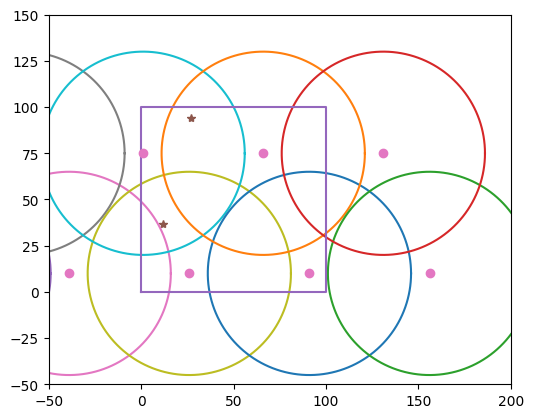

In [69]:
figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])
axes.plot(SAT_coord[:,0], SAT_coord[:,1], 'o')

plt.show()

In [ ]:
#거리 판단 다시

In [68]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])

#print(dist)
np.where(dist <= 50)

coverage_indicator = np.zeros((GS_size, SAT_len*2))
coverage_index = np.where(dist <= 50)
coverage_indicator[coverage_index[0], coverage_index[1]] = 1
print(coverage_indicator)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
coverage_index[0]

array([0, 1], dtype=int64)